In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('data/creditcard.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 284807 rows × 31 columns


## 1. Basic Data Overview

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

print("\n" + "="*80 + "\n")

# Display last few rows
print("Last 5 rows of the dataset:")
display(df.tail())

First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0




Last 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# Dataset info
print("Dataset Information:")
print("="*80)
df.info()

print("\n" + "="*80 + "\n")

# Data types
print("Data types:")
print(df.dtypes)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

## 2. Data Quality Assessment

In [5]:
# Check for missing values
print("Missing Values Analysis:")
print("="*80)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) == 0:
    print("✓ No missing values found in the dataset!")
else:
    display(missing_df)

print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values Analysis:
✓ No missing values found in the dataset!

Total missing values: 0


In [6]:
# Check for duplicates
print("Duplicate Rows Analysis:")
print("="*80)
duplicate_count = df.duplicated().sum()
duplicate_percentage = (duplicate_count / len(df)) * 100

print(f"Number of duplicate rows: {duplicate_count}")
print(f"Percentage of duplicates: {duplicate_percentage:.4f}%")

if duplicate_count > 0:
    print("\n⚠ Warning: Dataset contains duplicate rows!")
else:
    print("\n✓ No duplicate rows found!")

Duplicate Rows Analysis:
Number of duplicate rows: 1081
Percentage of duplicates: 0.3796%

⚠ Warning: Dataset contains duplicate rows!
Number of duplicate rows: 1081
Percentage of duplicates: 0.3796%

⚠ Warning: Dataset contains duplicate rows!


## 3. Statistical Summary

In [7]:
# Descriptive statistics
print("Descriptive Statistics:")
print("="*80)
display(df.describe().T)

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## 4. Target Variable Analysis (Class Imbalance)

In [8]:
# Analyze target variable (Class)
print("Target Variable Distribution:")
print("="*80)

if 'Class' in df.columns:
    class_counts = df['Class'].value_counts().sort_index()
    class_percentages = df['Class'].value_counts(normalize=True).sort_index() * 100
    
    class_summary = pd.DataFrame({
        'Class': class_counts.index,
        'Count': class_counts.values,
        'Percentage': class_percentages.values
    })
    
    display(class_summary)
    
    print(f"\nClass Distribution:")
    print(f"  - Non-Fraud (Class 0): {class_counts[0]:,} ({class_percentages[0]:.4f}%)")
    print(f"  - Fraud (Class 1): {class_counts[1]:,} ({class_percentages[1]:.4f}%)")
    print(f"\nImbalance Ratio: 1:{class_counts[0]/class_counts[1]:.2f}")
    
    if class_percentages[1] < 1:
        print("\n⚠ Warning: Highly imbalanced dataset! Special techniques may be needed.")
else:
    print("⚠ Warning: 'Class' column not found in dataset!")

Target Variable Distribution:


,Class,Count,Percentage
0,0,284315,99.827251
1,1,492,0.172749



Class Distribution:
  - Non-Fraud (Class 0): 284,315 (99.8273%)
  - Fraud (Class 1): 492 (0.1727%)

Imbalance Ratio: 1:577.88

⚠ Warning: Highly imbalanced dataset! Special techniques may be needed.


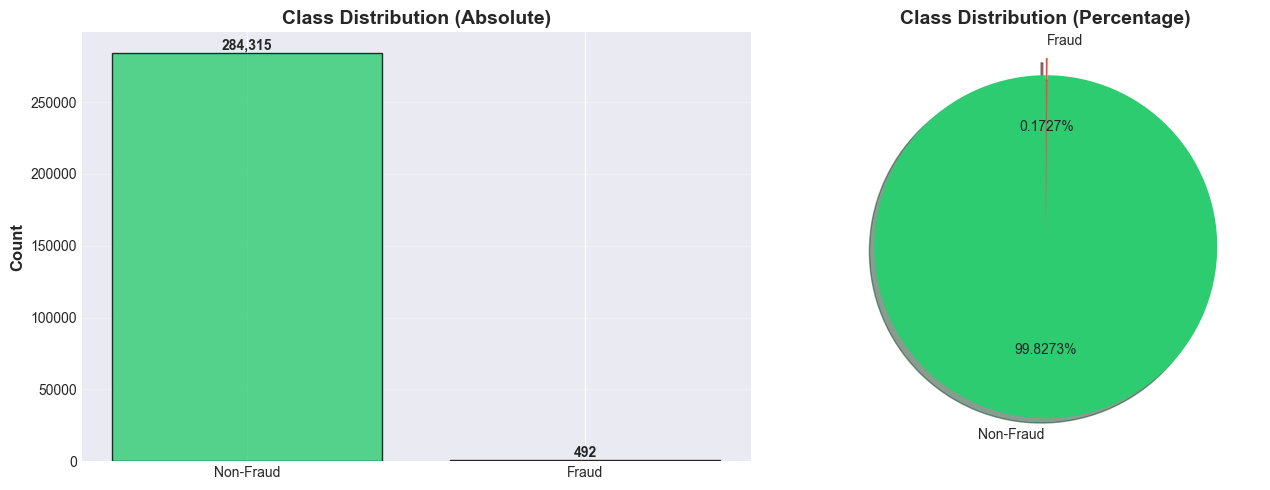

In [9]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
if 'Class' in df.columns:
    class_counts = df['Class'].value_counts().sort_index()
    
    axes[0].bar(['Non-Fraud', 'Fraud'], class_counts.values, color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
    axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[0].set_title('Class Distribution (Absolute)', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(class_counts.values):
        axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    colors = ['#2ecc71', '#e74c3c']
    explode = (0, 0.1)
    axes[1].pie(class_counts.values, labels=['Non-Fraud', 'Fraud'], autopct='%1.4f%%',
                startangle=90, colors=colors, explode=explode, shadow=True)
    axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Feature Analysis

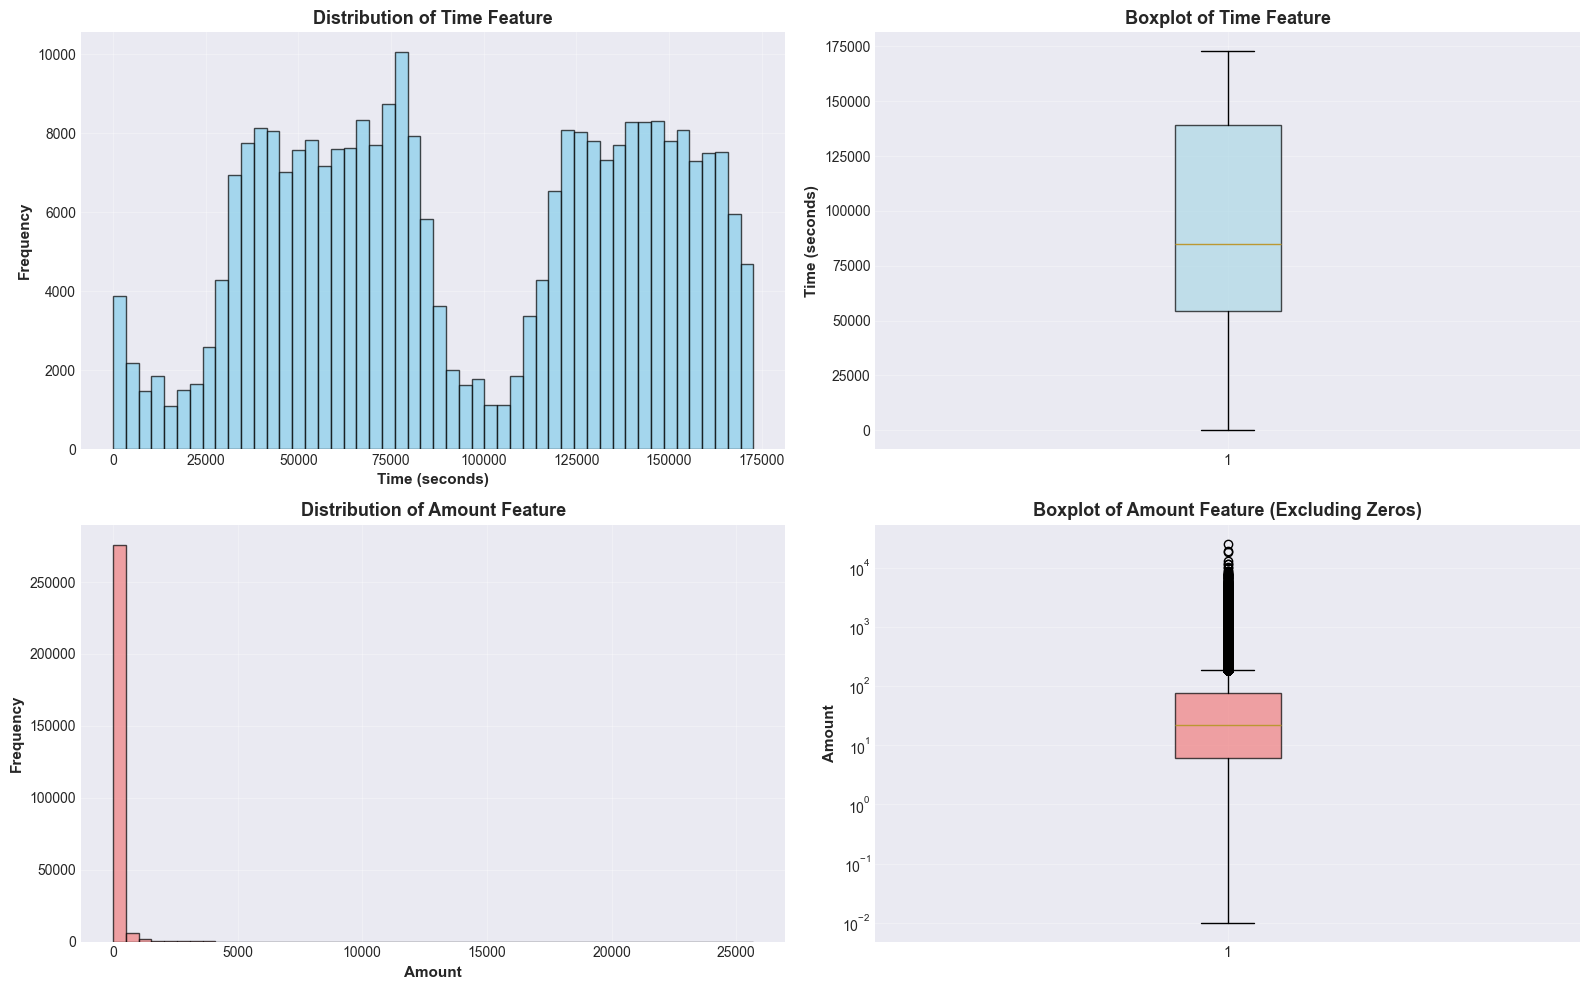

In [10]:
# Analyze feature distributions for Time and Amount (non-PCA features)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

if 'Time' in df.columns:
    # Time distribution
    axes[0, 0].hist(df['Time'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Time (seconds)', fontsize=11, fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[0, 0].set_title('Distribution of Time Feature', fontsize=13, fontweight='bold')
    axes[0, 0].grid(alpha=0.3)
    
    # Time boxplot
    axes[0, 1].boxplot(df['Time'], vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7))
    axes[0, 1].set_ylabel('Time (seconds)', fontsize=11, fontweight='bold')
    axes[0, 1].set_title('Boxplot of Time Feature', fontsize=13, fontweight='bold')
    axes[0, 1].grid(alpha=0.3)

if 'Amount' in df.columns:
    # Amount distribution
    axes[1, 0].hist(df['Amount'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[1, 0].set_xlabel('Amount', fontsize=11, fontweight='bold')
    axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[1, 0].set_title('Distribution of Amount Feature', fontsize=13, fontweight='bold')
    axes[1, 0].grid(alpha=0.3)
    
    # Amount boxplot (log scale for better visualization)
    axes[1, 1].boxplot(df['Amount'][df['Amount'] > 0], vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightcoral', alpha=0.7))
    axes[1, 1].set_ylabel('Amount', fontsize=11, fontweight='bold')
    axes[1, 1].set_title('Boxplot of Amount Feature (Excluding Zeros)', fontsize=13, fontweight='bold')
    axes[1, 1].set_yscale('log')
    axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Check for outliers in Amount feature
if 'Amount' in df.columns:
    print("Outlier Analysis for Amount Feature:")
    print("="*80)
    
    Q1 = df['Amount'].quantile(0.25)
    Q3 = df['Amount'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    print(f"Q1 (25th percentile): ${Q1:.2f}")
    print(f"Q3 (75th percentile): ${Q3:.2f}")
    print(f"IQR: ${IQR:.2f}")
    print(f"Lower bound: ${lower_bound:.2f}")
    print(f"Upper bound: ${upper_bound:.2f}")
    print(f"\nNumber of outliers: {len(outliers):,} ({outlier_percentage:.2f}%)")
    print(f"Max amount: ${df['Amount'].max():.2f}")
    print(f"Min amount: ${df['Amount'].min():.2f}")
    
    if outlier_percentage > 0:
        print(f"\n✓ Outliers detected - this is normal for fraud detection datasets.")

Outlier Analysis for Amount Feature:
Q1 (25th percentile): $5.60
Q3 (75th percentile): $77.16
IQR: $71.56
Lower bound: $-101.75
Upper bound: $184.51

Number of outliers: 31,904 (11.20%)
Max amount: $25691.16
Min amount: $0.00

✓ Outliers detected - this is normal for fraud detection datasets.


## 6. Correlation Analysis

Feature Correlations with Target (Class):

Top 10 Positively Correlated Features:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

Top 10 Negatively Correlated Features:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64

Top 10 Positively Correlated Features:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

Top 10 Negatively Correlated Features:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0

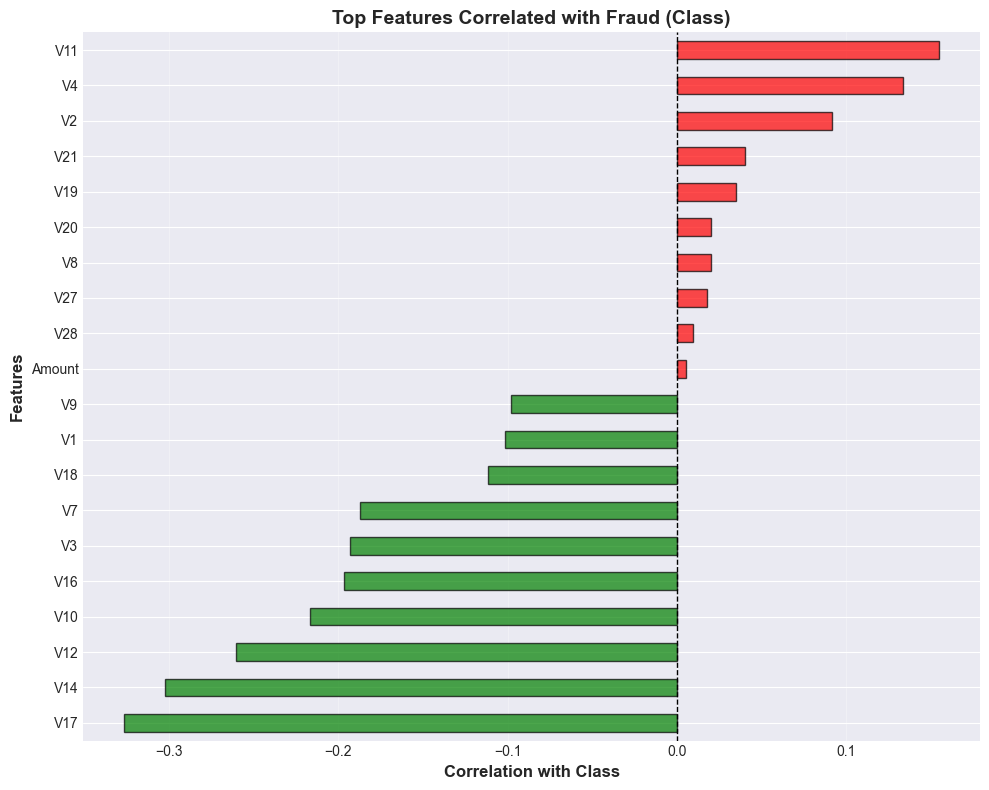

In [12]:
# Correlation with target variable
if 'Class' in df.columns:
    print("Feature Correlations with Target (Class):")
    print("="*80)
    
    correlations = df.corr()['Class'].sort_values(ascending=False)
    
    print("\nTop 10 Positively Correlated Features:")
    print(correlations.head(11))  # 11 to include Class itself
    
    print("\nTop 10 Negatively Correlated Features:")
    print(correlations.tail(10))
    
    # Visualize top correlations
    fig, ax = plt.subplots(figsize=(10, 8))
    
    top_features = pd.concat([correlations.head(11)[1:], correlations.tail(10)])
    colors = ['green' if x > 0 else 'red' for x in top_features.values]
    
    top_features.sort_values().plot(kind='barh', ax=ax, color=colors, alpha=0.7, edgecolor='black')
    ax.set_xlabel('Correlation with Class', fontsize=12, fontweight='bold')
    ax.set_ylabel('Features', fontsize=12, fontweight='bold')
    ax.set_title('Top Features Correlated with Fraud (Class)', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
    
    plt.tight_layout()
    plt.show()

## 7. Time-based Analysis

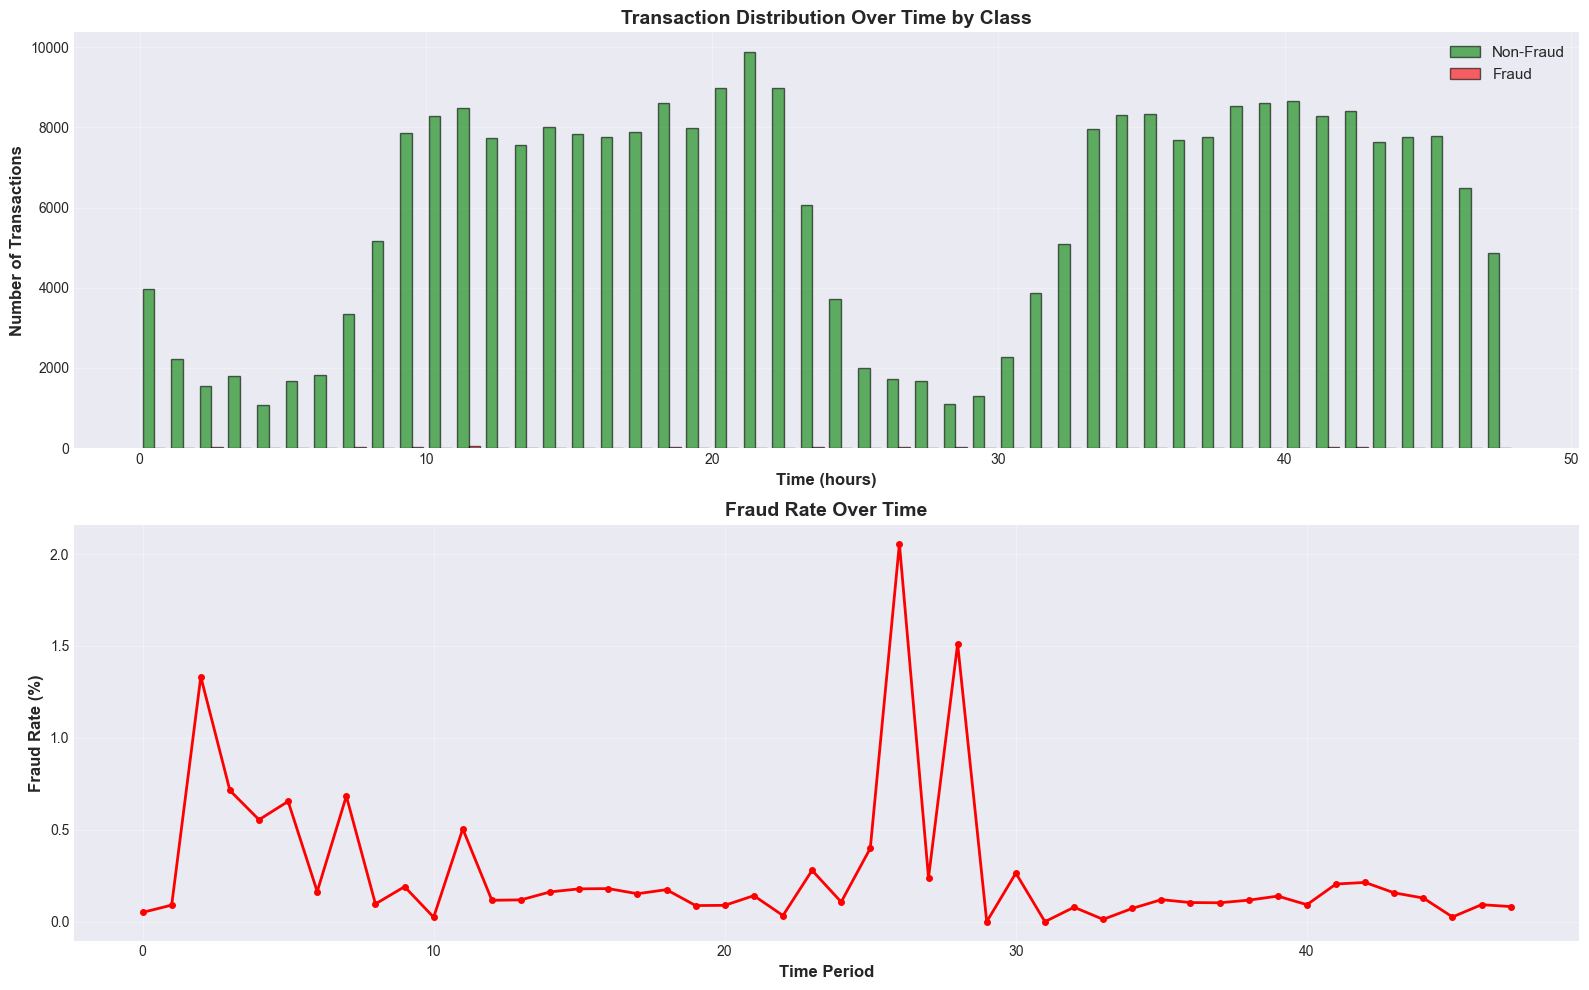

Time range: 0.00 - 48.00 hours
Average fraud rate: 0.1727%


In [13]:
# Analyze fraud patterns over time
if 'Time' in df.columns and 'Class' in df.columns:
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # Convert time to hours
    df['Time_hours'] = df['Time'] / 3600
    
    # Plot 1: Transaction distribution over time
    axes[0].hist([df[df['Class']==0]['Time_hours'], df[df['Class']==1]['Time_hours']], 
                 bins=48, label=['Non-Fraud', 'Fraud'], color=['green', 'red'], 
                 alpha=0.6, edgecolor='black')
    axes[0].set_xlabel('Time (hours)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Number of Transactions', fontsize=12, fontweight='bold')
    axes[0].set_title('Transaction Distribution Over Time by Class', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(alpha=0.3)
    
    # Plot 2: Fraud rate over time
    time_bins = pd.cut(df['Time_hours'], bins=48)
    fraud_rate = df.groupby(time_bins)['Class'].mean() * 100
    
    axes[1].plot(range(len(fraud_rate)), fraud_rate.values, color='red', marker='o', 
                 linewidth=2, markersize=4)
    axes[1].set_xlabel('Time Period', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
    axes[1].set_title('Fraud Rate Over Time', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Time range: {df['Time_hours'].min():.2f} - {df['Time_hours'].max():.2f} hours")
    print(f"Average fraud rate: {df['Class'].mean() * 100:.4f}%")

## 8. Amount Analysis by Class

Transaction Amount Analysis by Class:


,Metric,Non-Fraud,Fraud
0,Mean,88.291022,122.211321
1,Median,22.000000,9.250000
2,Std Dev,250.105092,256.683288
3,Min,0.000000,0.000000
4,Max,25691.160000,2125.870000
5,Q1,5.650000,1.000000
6,Q3,77.050000,105.890000


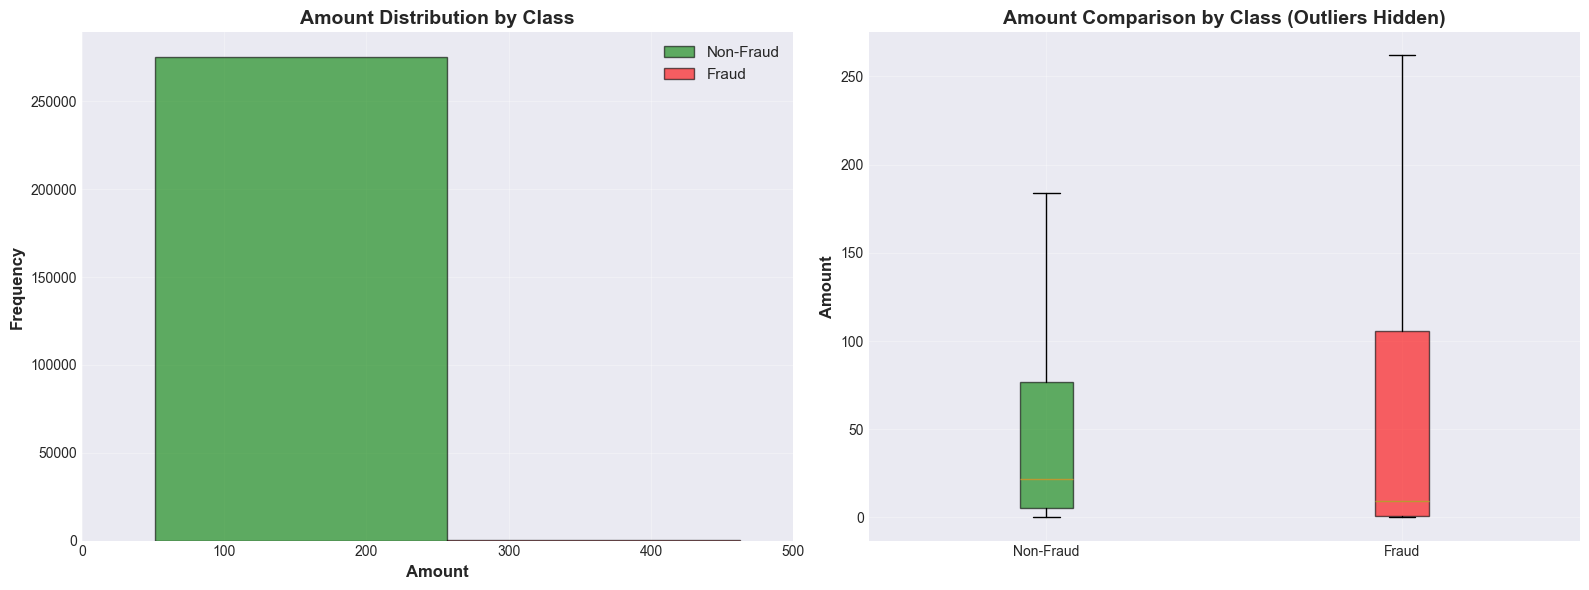

In [14]:
# Compare transaction amounts between fraud and non-fraud
if 'Amount' in df.columns and 'Class' in df.columns:
    print("Transaction Amount Analysis by Class:")
    print("="*80)
    
    fraud_amounts = df[df['Class'] == 1]['Amount']
    non_fraud_amounts = df[df['Class'] == 0]['Amount']
    
    comparison_df = pd.DataFrame({
        'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1', 'Q3'],
        'Non-Fraud': [
            non_fraud_amounts.mean(),
            non_fraud_amounts.median(),
            non_fraud_amounts.std(),
            non_fraud_amounts.min(),
            non_fraud_amounts.max(),
            non_fraud_amounts.quantile(0.25),
            non_fraud_amounts.quantile(0.75)
        ],
        'Fraud': [
            fraud_amounts.mean(),
            fraud_amounts.median(),
            fraud_amounts.std(),
            fraud_amounts.min(),
            fraud_amounts.max(),
            fraud_amounts.quantile(0.25),
            fraud_amounts.quantile(0.75)
        ]
    })
    
    display(comparison_df)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram comparison
    axes[0].hist([non_fraud_amounts, fraud_amounts], bins=50, 
                 label=['Non-Fraud', 'Fraud'], color=['green', 'red'], 
                 alpha=0.6, edgecolor='black')
    axes[0].set_xlabel('Amount', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[0].set_title('Amount Distribution by Class', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].set_xlim([0, 500])  # Limit x-axis for better visualization
    axes[0].grid(alpha=0.3)
    
    # Box plot comparison
    data_to_plot = [non_fraud_amounts, fraud_amounts]
    bp = axes[1].boxplot(data_to_plot, labels=['Non-Fraud', 'Fraud'], 
                         patch_artist=True, showfliers=False)
    bp['boxes'][0].set_facecolor('green')
    bp['boxes'][1].set_facecolor('red')
    for box in bp['boxes']:
        box.set_alpha(0.6)
    axes[1].set_ylabel('Amount', fontsize=12, fontweight='bold')
    axes[1].set_title('Amount Comparison by Class (Outliers Hidden)', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 9. Data Quality Summary & Recommendations

In [15]:
# Final data quality assessment
print("="*80)
print("DATA QUALITY ASSESSMENT SUMMARY")
print("="*80)

quality_checks = []

# 1. Missing values check
missing_count = df.isnull().sum().sum()
if missing_count == 0:
    quality_checks.append(("✓ No Missing Values", "PASS", "Dataset is complete"))
else:
    quality_checks.append(("✗ Missing Values Found", "FAIL", f"{missing_count} missing values"))

# 2. Duplicates check
duplicate_count = df.duplicated().sum()
if duplicate_count == 0:
    quality_checks.append(("✓ No Duplicates", "PASS", "All rows are unique"))
else:
    quality_checks.append(("⚠ Duplicates Found", "WARNING", f"{duplicate_count} duplicate rows"))

# 3. Data types check
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) == len(df.columns):
    quality_checks.append(("✓ All Numeric Features", "PASS", "All features are numeric"))
else:
    quality_checks.append(("⚠ Mixed Data Types", "WARNING", "Contains non-numeric features"))

# 4. Class imbalance check
if 'Class' in df.columns:
    fraud_percentage = (df['Class'].sum() / len(df)) * 100
    if fraud_percentage < 1:
        quality_checks.append(("⚠ Highly Imbalanced", "WARNING", f"Fraud: {fraud_percentage:.4f}%"))
    else:
        quality_checks.append(("✓ Balanced Dataset", "PASS", f"Fraud: {fraud_percentage:.2f}%"))

# 5. Sample size check
if len(df) > 10000:
    quality_checks.append(("✓ Sufficient Sample Size", "PASS", f"{len(df):,} samples"))
else:
    quality_checks.append(("⚠ Small Sample Size", "WARNING", f"Only {len(df):,} samples"))

# 6. Feature availability
if len(df.columns) > 10:
    quality_checks.append(("✓ Rich Feature Set", "PASS", f"{len(df.columns)} features available"))
else:
    quality_checks.append(("⚠ Limited Features", "WARNING", f"Only {len(df.columns)} features"))

print("\nQuality Checks:")
print("-" * 80)
for check, status, detail in quality_checks:
    print(f"{check:40s} [{status:8s}] {detail}")

print("\n" + "="*80)
print("RECOMMENDATIONS FOR MODELING:")
print("="*80)

recommendations = []

if 'Class' in df.columns and (df['Class'].sum() / len(df)) * 100 < 1:
    recommendations.append("1. Handle class imbalance using:")
    recommendations.append("   - SMOTE (Synthetic Minority Over-sampling)")
    recommendations.append("   - Class weights in model")
    recommendations.append("   - Ensemble methods (Random Forest, XGBoost)")

if 'Amount' in df.columns:
    recommendations.append("\n2. Feature scaling recommended for 'Amount' and 'Time' features")
    recommendations.append("   - Use StandardScaler or RobustScaler")

recommendations.append("\n3. Evaluation metrics to use:")
recommendations.append("   - Precision, Recall, F1-Score (NOT accuracy due to imbalance)")
recommendations.append("   - ROC-AUC and PR-AUC curves")
recommendations.append("   - Confusion matrix")

recommendations.append("\n4. Cross-validation strategy:")
recommendations.append("   - Use Stratified K-Fold to maintain class distribution")
recommendations.append("   - Consider time-based splits if temporal patterns exist")

recommendations.append("\n5. Model suggestions:")
recommendations.append("   - Logistic Regression (baseline)")
recommendations.append("   - Random Forest")
recommendations.append("   - XGBoost/LightGBM")
recommendations.append("   - Neural Networks")

for rec in recommendations:
    print(rec)

print("\n" + "="*80)
print("CONCLUSION:")
print("="*80)

if missing_count == 0 and len(df) > 10000:
    print("✓ This dataset is SUITABLE for analysis and modeling!")
    print("  The data is clean, complete, and has sufficient samples.")
    print("  Main challenge: Class imbalance - use appropriate techniques.")
else:
    print("⚠ This dataset requires preprocessing before modeling.")
    print("  Address the warnings mentioned above.")

print("="*80)

DATA QUALITY ASSESSMENT SUMMARY

Quality Checks:
--------------------------------------------------------------------------------
✓ No Missing Values                      [PASS    ] Dataset is complete
⚠ Duplicates Found                       [WARNING ] 1081 duplicate rows
✓ All Numeric Features                   [PASS    ] All features are numeric
⚠ Highly Imbalanced                      [WARNING ] Fraud: 0.1727%
✓ Sufficient Sample Size                 [PASS    ] 284,807 samples
✓ Rich Feature Set                       [PASS    ] 32 features available

RECOMMENDATIONS FOR MODELING:
1. Handle class imbalance using:
   - SMOTE (Synthetic Minority Over-sampling)
   - Class weights in model
   - Ensemble methods (Random Forest, XGBoost)

2. Feature scaling recommended for 'Amount' and 'Time' features
   - Use StandardScaler or RobustScaler

3. Evaluation metrics to use:
   - Precision, Recall, F1-Score (NOT accuracy due to imbalance)
   - ROC-AUC and PR-AUC curves
   - Confusion matrix



---

# 📋 Project Roadmap: Next Phases

Below are the sequential phases to complete this credit fraud detection project. Copy and paste each prompt to Copilot when you're ready to proceed to the next phase.

## **Phase 1: Data Preprocessing & Feature Engineering**
```
Prepare the dataset for modeling: handle the 1,081 duplicate rows, scale the Time and Amount features using StandardScaler, and create any useful derived features. Split the data into training and test sets using stratified sampling to maintain class distribution.
```

## **Phase 2: Baseline Model - Logistic Regression**
```
Build a baseline logistic regression model on the imbalanced data. Evaluate it using precision, recall, F1-score, ROC-AUC, and confusion matrix. This will serve as our performance benchmark.
```

## **Phase 3: Handle Class Imbalance with SMOTE**
```
Apply SMOTE (Synthetic Minority Over-sampling Technique) to the training data to balance the classes. Train a new logistic regression model on the balanced data and compare performance metrics with the baseline model.
```

## **Phase 4: Random Forest Classifier**
```
Build a Random Forest classifier with class weights to handle imbalance. Use cross-validation with stratified k-fold. Evaluate performance and analyze feature importance to identify the most predictive features.
```

## **Phase 5: XGBoost Model**
```
Implement an XGBoost classifier with scale_pos_weight parameter to handle class imbalance. Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV to optimize model performance.
```

## **Phase 6: Neural Network Model**
```
Build a neural network using TensorFlow/Keras with dropout layers and batch normalization. Use class weights and early stopping. Train the model and evaluate its performance on the test set.
```

## **Phase 7: Model Comparison & Selection**
```
Create a comprehensive comparison of all models (Logistic Regression, Logistic Regression with SMOTE, Random Forest, XGBoost, Neural Network) across all metrics. Generate comparison tables and visualizations. Select the best model based on business requirements prioritizing fraud detection (high recall) while maintaining reasonable precision.
```

## **Phase 8: Model Interpretation & Error Analysis**
```
Perform error analysis on the best model: examine false positives and false negatives, analyze misclassified transactions, generate SHAP values or feature importance plots, and create visualizations showing which features contribute most to fraud predictions.
```

## **Phase 9: Threshold Optimization**
```
Optimize the classification threshold for the best model by analyzing the precision-recall tradeoff. Create precision-recall curves and determine the optimal threshold that maximizes F1-score or achieves business-defined targets (e.g., 95% recall).
```

## **Phase 10: Final Report & Model Deployment Preparation**
```
Create a final summary report with: executive summary, best model details, performance metrics, business impact analysis (cost-benefit of catching fraud vs false alarms), deployment recommendations, and monitoring strategy. Save the final model using joblib or pickle for future use.
```

---

### 📝 **Usage Instructions**

1. **Copy the prompt** from any phase above (the text in the code block)
2. **Paste it to Copilot** in the chat
3. **Wait for completion** - Copilot will implement all code and analysis for that phase
4. **Review the results** before moving to the next phase
5. **Iterate if needed** - Ask follow-up questions or request modifications

### 💡 **Tips**
- You can skip phases if certain approaches aren't needed
- You can combine adjacent phases if you want faster progress (e.g., "Do phases 4 and 5")
- You can add custom requirements to any phase (e.g., "Do phase 4 but also test LightGBM")
- Feel free to deviate from this roadmap based on your findings

---